# CPI Analysis

In [1]:
# import the necessary libraries, set options, and define utility functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

pd.options.display.max_columns = None

def overview(df):
    print(df.head(5))
    print(df.columns)
    print(df.describe())

In [2]:
# import CPI data from 2012-2021
CPI_2021 = pd.read_csv("datasets/CPI/CPI2021-Table 1.csv", header=2)
CPI_2020 = pd.read_csv("datasets/CPI/CPI2020-Table 1.csv", header=2)
CPI_2019 = pd.read_csv("datasets/CPI/CPI2019-Table 1.csv", header=2)
CPI_2018 = pd.read_csv("datasets/CPI/CPI2018-Table 1.csv", header=2)
CPI_2017 = pd.read_csv("datasets/CPI/CPI2017-Table 1.csv", header=2)
CPI_2016 = pd.read_csv("datasets/CPI/CPI2016-Table 1.csv")
CPI_2015 = pd.read_csv("datasets/CPI/CPI2015-Table 1.csv")
CPI_2014 = pd.read_csv("datasets/CPI/CPI2014-Table 1.csv")
CPI_2013 = pd.read_csv("datasets/CPI/CPI2013-Table 1.csv", header=1)
CPI_2012 = pd.read_csv("datasets/CPI/CPI2012-Table 1.csv")

# retrieve the Country, ISO3, Region, CPI score, and rank columns
# 2021

CPI_2021 = CPI_2021.iloc[:, :5]
CPI_2021.rename(columns={ "Country / Territory": "Country", "Rank": "Rank 2021"}, inplace=True)

# 2020
CPI_2020 = CPI_2020.iloc[:, :5]
CPI_2020.rename(columns={ "Rank": "Rank 2020"}, inplace=True)

CPI = CPI_2021.merge(CPI_2020, how="outer", on=["Country", "ISO3", "Region"])

# 2019
CPI_2019 = CPI_2019.iloc[:, :5]
CPI_2019.rename(columns={ "Rank": "Rank 2019"}, inplace=True)

CPI = CPI.merge(CPI_2019, how="outer", on=["Country", "ISO3", "Region"])

# 2018
CPI_2018 = CPI_2018.iloc[:, :5]
CPI_2018.rename(columns={ "Rank ": "Rank 2018", "CPI Score 2018": "CPI score 2018"}, inplace=True)

CPI = CPI.merge(CPI_2018, how="outer", on=["Country", "ISO3", "Region"])


# 2017
CPI_2017 = CPI_2017.iloc[:, :5]
CPI_2017.rename(columns={ "Rank ": "Rank 2017", "CPI Score 2017": "CPI score 2017"}, inplace=True)

CPI = CPI.merge(CPI_2017, how="outer", on=["Country", "ISO3", "Region"])

# 2016
CPI_2016 = CPI_2016.iloc[:, :4]
CPI_2016.rename(columns={ "CPI2016": "CPI score 2016", "Rank": "Rank 2016"}, inplace=True)

CPI = CPI.merge(CPI_2016, how="outer", on=["Country"], suffixes=["", "_2016"])
CPI.drop("Region_2016", axis=1, inplace=True)

# 2015
CPI_2015 = CPI_2015.iloc[:, :5]
CPI_2015.drop("Region", axis=1, inplace=True)
CPI_2015.rename(columns={ "CPI 2015 Score": "CPI score 2015", "Country Rank": "Rank 2015", "Country/Territory": "Country", "Country Code": "ISO3"}, inplace=True)

CPI = CPI.merge(CPI_2015, how="outer", on=["Country"], suffixes=["", "_2015"])

# 2014
CPI_2014 = CPI_2014.iloc[:, :5]
CPI_2014.drop("Region", axis=1, inplace=True)
CPI_2014.rename(columns={ "CPI 2014": "CPI score 2014", "Country Rank": "Rank 2014", "Country/Territory": "Country", "Country Code": "ISO3"}, inplace=True)
CPI = CPI.merge(CPI_2014, how="outer", on=["Country"], suffixes=["", "_2014"])

# 2013
CPI_2013 = CPI_2013.iloc[:, :7]
CPI_2013.drop(labels=["Region", "IFS Code", "Country Rank.1"], axis=1, inplace=True)
CPI_2013.rename(columns={ "CPI 2013 Score": "CPI score 2013", "Country Rank": "Rank 2013", "Country / Territory": "Country", "Country Code": "ISO3", "WB Code": "ISO3"}, inplace=True)
CPI = CPI.merge(CPI_2013, how="outer", on=["Country"], suffixes=["", "_2013"])

# 2012
CPI_2012 = CPI_2012.iloc[:, :4]
CPI_2012.drop(labels=["Unnamed: 2"], axis=1, inplace=True)
CPI_2012.rename(columns={ "CPI 2012 Score": "CPI score 2012", "Country Rank": "Rank 2012", "Country / Territory": "Country"}, inplace=True)
CPI = CPI.merge(CPI_2012, how="outer", on=["Country"], suffixes=["", "_2012"])


# sanity check
CPI

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,ISO3_2015,CPI score 2015,Rank 2014,ISO3_2014,CPI score 2014,Rank 2013,ISO3_2013,CPI score 2013,Rank 2012,CPI score 2012
0,Denmark,DNK,WE/EU,88.0,1.0,88.0,1.0,87.0,1.0,88.0,1.0,88.0,2.0,90.0,1.0,1.0,DNK,91.0,1.0,DNK,92.0,1.0,DNK,91.0,1.0,90.0
1,Finland,FIN,WE/EU,88.0,1.0,85.0,3.0,86.0,3.0,85.0,3.0,85.0,3.0,89.0,3.0,3.0,FIN,90.0,3.0,FIN,89.0,3.0,FIN,89.0,1.0,90.0
2,New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0,87.0,2.0,89.0,1.0,90.0,1.0,1.0,NZL,91.0,2.0,NZL,91.0,1.0,NZL,91.0,1.0,90.0
3,Norway,NOR,WE/EU,85.0,4.0,84.0,7.0,84.0,7.0,84.0,7.0,85.0,3.0,85.0,6.0,5.0,NOR,88.0,5.0,NOR,86.0,5.0,NOR,86.0,7.0,85.0
4,Singapore,SGP,AP,85.0,4.0,85.0,3.0,85.0,4.0,85.0,3.0,84.0,6.0,84.0,7.0,7.0,SGP,85.0,7.0,SGP,84.0,5.0,SGP,86.0,5.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Korea (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,174.0,167.0,PRK,8.0,174.0,PRK,8.0,175.0,PRK,8.0,174.0,8.0
199,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,USA,76.0,17.0,USA,74.0,19.0,USA,73.0,19.0,73.0
200,Côte d´Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,CIV,32.0,115.0,CIV,32.0,136.0,CIV,27.0,130.0,29.0
201,Congo Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,COG,23.0,152.0,COG,23.0,154.0,COG,22.0,144.0,26.0


In [3]:
CPI.head(5)

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,ISO3_2015,CPI score 2015,Rank 2014,ISO3_2014,CPI score 2014,Rank 2013,ISO3_2013,CPI score 2013,Rank 2012,CPI score 2012
0,Denmark,DNK,WE/EU,88.0,1.0,88.0,1.0,87.0,1.0,88.0,1.0,88.0,2.0,90.0,1.0,1.0,DNK,91.0,1.0,DNK,92.0,1.0,DNK,91.0,1.0,90.0
1,Finland,FIN,WE/EU,88.0,1.0,85.0,3.0,86.0,3.0,85.0,3.0,85.0,3.0,89.0,3.0,3.0,FIN,90.0,3.0,FIN,89.0,3.0,FIN,89.0,1.0,90.0
2,New Zealand,NZL,AP,88.0,1.0,88.0,1.0,87.0,1.0,87.0,2.0,89.0,1.0,90.0,1.0,1.0,NZL,91.0,2.0,NZL,91.0,1.0,NZL,91.0,1.0,90.0
3,Norway,NOR,WE/EU,85.0,4.0,84.0,7.0,84.0,7.0,84.0,7.0,85.0,3.0,85.0,6.0,5.0,NOR,88.0,5.0,NOR,86.0,5.0,NOR,86.0,7.0,85.0
4,Singapore,SGP,AP,85.0,4.0,85.0,3.0,85.0,4.0,85.0,3.0,84.0,6.0,84.0,7.0,7.0,SGP,85.0,7.0,SGP,84.0,5.0,SGP,86.0,5.0,87.0


In [4]:
CPI.tail(5)

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,ISO3_2015,CPI score 2015,Rank 2014,ISO3_2014,CPI score 2014,Rank 2013,ISO3_2013,CPI score 2013,Rank 2012,CPI score 2012
198,Korea (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,174.0,167.0,PRK,8.0,174.0,PRK,8.0,175.0,PRK,8.0,174.0,8.0
199,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,USA,76.0,17.0,USA,74.0,19.0,USA,73.0,19.0,73.0
200,Côte d´Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,CIV,32.0,115.0,CIV,32.0,136.0,CIV,27.0,130.0,29.0
201,Congo Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,COG,23.0,152.0,COG,23.0,154.0,COG,22.0,144.0,26.0
202,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,PRI,63.0,33.0,PRI,62.0,33.0,63.0


In [5]:
CPI.columns

Index(['Country', 'ISO3', 'Region', 'CPI score 2021', 'Rank 2021',
       'CPI score 2020', 'Rank 2020', 'CPI score 2019', 'Rank 2019',
       'CPI score 2018', 'Rank 2018', 'CPI score 2017', 'Rank 2017',
       'CPI score 2016', 'Rank 2016', 'Rank 2015', 'ISO3_2015',
       'CPI score 2015', 'Rank 2014', 'ISO3_2014', 'CPI score 2014',
       'Rank 2013', 'ISO3_2013', 'CPI score 2013', 'Rank 2012',
       'CPI score 2012'],
      dtype='object')

In [6]:
CPI.describe()

,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,181.000000,180.000000,176.000000,176.000000,168.000000,168.000000,175.000000,175.000000,177.000000,177.000000,176.000000,176.000000
mean,43.266667,89.072222,43.344444,88.966667,43.166667,88.966667,43.116667,89.127778,43.072210,89.116667,42.948864,87.198864,83.160714,42.595238,86.571429,43.268571,87.644068,42.655367,87.170455,43.267045
std,18.780591,51.881798,18.875162,51.759532,18.960264,51.656353,19.142008,51.748320,18.998547,51.765185,19.436716,50.543562,48.265152,20.195819,50.400058,19.840510,50.863597,19.922859,50.518618,19.674269
min,11.000000,1.000000,12.000000,1.000000,9.000000,1.000000,10.000000,1.000000,9.000000,1.000000,10.000000,1.000000,1.000000,8.000000,1.000000,8.000000,1.000000,8.000000,1.000000,8.000000
25%,29.750000,45.000000,29.000000,45.000000,29.000000,44.000000,29.000000,45.000000,29.000000,45.000000,29.000000,44.000000,42.250000,28.000000,44.000000,29.000000,45.000000,28.000000,44.500000,28.750000
50%,39.000000,87.000000,40.000000,86.000000,39.500000,88.000000,38.000000,89.000000,39.000000,88.000000,38.000000,87.000000,83.000000,37.000000,85.000000,38.000000,83.000000,38.000000,88.000000,37.000000
75%,55.000000,130.000000,56.000000,134.000000,56.000000,130.000000,57.000000,132.000000,56.000000,135.000000,57.000000,131.000000,123.000000,54.250000,126.000000,55.000000,127.000000,56.000000,130.750000,56.250000
max,88.000000,180.000000,88.000000,179.000000,87.000000,180.000000,88.000000,180.000000,89.000000,180.000000,90.000000,176.000000,167.000000,91.000000,174.000000,92.000000,175.000000,91.000000,174.000000,90.000000


In [7]:
CPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         202 non-null    object 
 1   ISO3            186 non-null    object 
 2   Region          186 non-null    object 
 3   CPI score 2021  180 non-null    float64
 4   Rank 2021       180 non-null    float64
 5   CPI score 2020  180 non-null    float64
 6   Rank 2020       180 non-null    float64
 7   CPI score 2019  180 non-null    float64
 8   Rank 2019       180 non-null    float64
 9   CPI score 2018  180 non-null    float64
 10  Rank 2018       180 non-null    float64
 11  CPI score 2017  181 non-null    float64
 12  Rank 2017       180 non-null    float64
 13  CPI score 2016  176 non-null    float64
 14  Rank 2016       176 non-null    float64
 15  Rank 2015       168 non-null    float64
 16  ISO3_2015       168 non-null    object 
 17  CPI score 2015  168 non-null    flo

In [8]:
# there are some null values in the final dataframe
# let's see if we can clean them up

# Country's frequency table

CPI["Country"].value_counts(dropna=False)

Denmark               1
Mauritania            1
Djibouti              1
Dominican Republic    1
Laos                  1
                     ..
South Africa          1
Tunisia               1
Ghana                 1
Hungary               1
Puerto Rico           1
Name: Country, Length: 203, dtype: int64

In [9]:
# Country's columns
CPI.columns

Index(['Country', 'ISO3', 'Region', 'CPI score 2021', 'Rank 2021',
       'CPI score 2020', 'Rank 2020', 'CPI score 2019', 'Rank 2019',
       'CPI score 2018', 'Rank 2018', 'CPI score 2017', 'Rank 2017',
       'CPI score 2016', 'Rank 2016', 'Rank 2015', 'ISO3_2015',
       'CPI score 2015', 'Rank 2014', 'ISO3_2014', 'CPI score 2014',
       'Rank 2013', 'ISO3_2013', 'CPI score 2013', 'Rank 2012',
       'CPI score 2012'],
      dtype='object')

In [10]:
# we discovered some duplicate ISO3 columns

# the ISO3 code for certain countries has changed some time in between 2012 to 2021
# e.g. Montenegro's ISO3 was once MON but it changed to MNE after the CPI 2015 data was published
# trivia: actually, the ISO3 change for Montenegro happened in 2007, but the CPI dataset still used the old ISO3 code

# we'll keep the newest ISO3 and drop the rest
CPI = CPI.drop(["ISO3_2015", "ISO3_2014", "ISO3_2013"], axis=1)
CPI.columns
# CPI[CPI["ISO3"] == np.nan]

Index(['Country', 'ISO3', 'Region', 'CPI score 2021', 'Rank 2021',
       'CPI score 2020', 'Rank 2020', 'CPI score 2019', 'Rank 2019',
       'CPI score 2018', 'Rank 2018', 'CPI score 2017', 'Rank 2017',
       'CPI score 2016', 'Rank 2016', 'Rank 2015', 'CPI score 2015',
       'Rank 2014', 'CPI score 2014', 'Rank 2013', 'CPI score 2013',
       'Rank 2012', 'CPI score 2012'],
      dtype='object')

In [11]:
# there's a null value we haven't checked
# the curious thing is the value_counts doesn't show the NaN value
CPI["Country"].value_counts(dropna=False)

# we'll directly retrieve it with isnull
CPI[CPI["Country"].isnull()]



,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# row with index 186 has NaN for all its columns
# it probably came from an empty row in one of the original datasets
# we can safely drop it
CPI.drop(186, axis=0, inplace=True)
CPI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 202
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         202 non-null    object 
 1   ISO3            186 non-null    object 
 2   Region          186 non-null    object 
 3   CPI score 2021  180 non-null    float64
 4   Rank 2021       180 non-null    float64
 5   CPI score 2020  180 non-null    float64
 6   Rank 2020       180 non-null    float64
 7   CPI score 2019  180 non-null    float64
 8   Rank 2019       180 non-null    float64
 9   CPI score 2018  180 non-null    float64
 10  Rank 2018       180 non-null    float64
 11  CPI score 2017  181 non-null    float64
 12  Rank 2017       180 non-null    float64
 13  CPI score 2016  176 non-null    float64
 14  Rank 2016       176 non-null    float64
 15  Rank 2015       168 non-null    float64
 16  CPI score 2015  168 non-null    float64
 17  Rank 2014       175 non-null    flo

In [13]:
# while looking for the null country, we also discovered a country named GLOBAL AVARAGE below the previous row with index 186
# there's barely any data in the GLOBAL AVARAGE and we don't need any of them
# we decided to drop it
CPI.drop(187, axis=0, inplace=True)
CPI.iloc[[187]]

# dropping the columns didn't reset index; let's do that
CPI.reset_index(drop=True, inplace=True)

In [14]:
# there are some other peculiarities with the Country columns
# The USA has multiple rows representing it because their country names differ
# 1. United States of America
# 2. The United States of America
# 3. United States

CPI[CPI["Country"].str.match(r"(The )?United States")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
27,United States of America,USA,AME,67.0,27.0,67.0,25.0,69.0,23.0,71.0,22.0,75.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,The United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,76.0,17.0,74.0,19.0,73.0,19.0,73.0


In [15]:
# we'll stick with the row that has the most recent data ,i.e. row 27 with the name United States of America, 
# and fill the missing values using data from the older rows

# this is a recurring issue, so it pays to create a function for it
# replace values of row with keep_index with values from row with copy_index based on the column names passed
#
# finish by dropping the copied rows and reset index
def clean_inconsistent_names(df, keep_indexes, copy_dicts):
    for keep_index, copy_dict in zip(keep_indexes, copy_dicts):
        for copy_index, cols in copy_dict.items():
            CPI.loc[keep_index, cols] = CPI.loc[copy_index, cols]
    
    drop_rows = []
    for dict in copy_dicts:
            drop_rows += dict.keys()
    drop_rows = list(drop_rows)
    # DEBUG
    # print(drop_rows)
    CPI.drop(drop_rows, axis=0, inplace=True)
    CPI.reset_index(drop=True, inplace=True)

copy_usa_dicts = {186: ["CPI score 2016", "Rank 2016"], 
                  197: ["CPI score 2015", "Rank 2015", 
                        "CPI score 2014", "Rank 2014", 
                        "CPI score 2013", "Rank 2013", 
                        "CPI score 2012", "Rank 2012"]}
clean_inconsistent_names(CPI, [27], [copy_usa_dicts])
# clean_inconsistent_names(CPI, 27, 197, ["CPI score 2015", "Rank 2015", 
#              "CPI score 2014", "Rank 2014", 
#              "CPI score 2013", "Rank 2013", 
#              "CPI score 2012", "Rank 2012"])

# CPI.loc[27, ["CPI score 2016", "Rank 2016"]] = CPI.loc[186, ["CPI score 2016", "Rank 2016"]]
# CPI.loc[27, ["CPI score 2015", "Rank 2015", 
#              "CPI score 2014", "Rank 2014", 
#              "CPI score 2013", "Rank 2013", 
#              "CPI score 2012", "Rank 2012"]] = CPI.loc[197, ["CPI score 2015", "Rank 2015", 
#                                                              "CPI score 2014", "Rank 2014", 
#                                                              "CPI score 2013", "Rank 2013", 
#                                                              "CPI score 2012", "Rank 2012"]]


# we'll also drop the two rows and reset the index afterwards

CPI[CPI["Country"].str.match(r"(The )?United States")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
27,United States of America,USA,AME,67.0,27.0,67.0,25.0,69.0,23.0,71.0,22.0,75.0,16.0,74.0,18.0,16.0,76.0,17.0,74.0,19.0,73.0,19.0,73.0


In [16]:
# Country has no null and duplicate values as of now
CPI.info()
CPI[CPI.duplicated(subset="Country")]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         199 non-null    object 
 1   ISO3            186 non-null    object 
 2   Region          186 non-null    object 
 3   CPI score 2021  180 non-null    float64
 4   Rank 2021       180 non-null    float64
 5   CPI score 2020  180 non-null    float64
 6   Rank 2020       180 non-null    float64
 7   CPI score 2019  180 non-null    float64
 8   Rank 2019       180 non-null    float64
 9   CPI score 2018  180 non-null    float64
 10  Rank 2018       180 non-null    float64
 11  CPI score 2017  180 non-null    float64
 12  Rank 2017       180 non-null    float64
 13  CPI score 2016  176 non-null    float64
 14  Rank 2016       176 non-null    float64
 15  Rank 2015       168 non-null    float64
 16  CPI score 2015  168 non-null    float64
 17  Rank 2014       175 non-null    flo

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012


In [17]:
# ISO3 has a some null values as well
# we'll also be looking for duplicates once the null values are handled

CPI[CPI["ISO3"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
186,Saint Vincent and The Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0
188,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0
189,Korea (South),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,52.0,43.0,54.0,44.0,55.0,46.0,55.0,45.0,56.0
190,The FYR of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,90.0,66.0,42.0,64.0,45.0,NaN,NaN,NaN,NaN
191,Côte d’Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Guinea-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0
195,Korea (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,174.0,167.0,8.0,174.0,8.0,175.0,8.0,174.0,8.0


In [18]:
# while reviewing the ISO3 duplicates, we discovered Country duplicates we didn't manage to capture before this
# e.g. Côte d’Ivoire is slightly different than  Côte d´Ivoire because of the use of Greek oxia character in place of apostrophe
#
# other than that, there is another country with the same naming issue as the United States — Republic of Congo
#
# South and North Korea possibly have inconsistent names as well

# we'll start by examining both the Korea countries

CPI[CPI["Country"].str.contains("Korea")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
31,"Korea, South",KOR,AP,62.0,32.0,61.0,33.0,59.0,39.0,57.0,45.0,54.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,"Korea, North",PRK,AP,16.0,174.0,18.0,170.0,17.0,172.0,14.0,176.0,17.0,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,Korea (South),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,52.0,43.0,54.0,44.0,55.0,46.0,55.0,45.0,56.0
195,Korea (North),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,174.0,167.0,8.0,174.0,8.0,175.0,8.0,174.0,8.0


In [19]:
# copy data to most recent Korea countries rows

skorea_clean_dict = {189:  ["CPI score 2016", "Rank 2016", "CPI score 2015", "Rank 2015", 
             "CPI score 2014", "Rank 2014", 
             "CPI score 2013", "Rank 2013", 
             "CPI score 2012", "Rank 2012"]}

nkorea_clean_dict = {195:  ["CPI score 2016", "Rank 2016", "CPI score 2015", "Rank 2015", 
             "CPI score 2014", "Rank 2014", 
             "CPI score 2013", "Rank 2013", 
             "CPI score 2012", "Rank 2012"]}

# clean both Korean countries
clean_inconsistent_names(CPI, [31, 174], [skorea_clean_dict, nkorea_clean_dict])

CPI[CPI["Country"].str.contains("Korea")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
31,"Korea, South",KOR,AP,62.0,32.0,61.0,33.0,59.0,39.0,57.0,45.0,54.0,51.0,53.0,52.0,43.0,54.0,44.0,55.0,46.0,55.0,45.0,56.0
174,"Korea, North",PRK,AP,16.0,174.0,18.0,170.0,17.0,172.0,14.0,176.0,17.0,171.0,12.0,174.0,167.0,8.0,174.0,8.0,175.0,8.0,174.0,8.0


In [20]:
# we'll target Côte d’Ivoire next
CPI[CPI["ISO3"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
186,Saint Vincent and The Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0
188,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0
189,The FYR of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,90.0,66.0,42.0,64.0,45.0,NaN,NaN,NaN,NaN
190,Côte d’Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Guinea-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0
194,Côte d´Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0
195,Congo Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0


In [21]:
# we'll target Côte d’Ivoire next
CPI[CPI["Country"].str.contains("Côte")]


,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
181,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,Côte D'Ivoire,CIV,SSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,Côte d’Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Côte d´Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0


In [22]:
# the clean_inconsistent_names doesn't work well for Côte d’Ivoire
# so, we'll resort to copying the data without it

CPI.loc[181, ["CPI score 2017", "Rank 2017"]] = CPI.loc[185, ["CPI score 2017", "Rank 2017"]]
CPI.loc[181, ["CPI score 2016", "Rank 2016"]] = CPI.loc[190, ["CPI score 2016", "Rank 2016"]]
CPI.loc[181, ["CPI score 2015", "Rank 2015", 
              "CPI score 2014", "Rank 2014", 
              "CPI score 2013", "Rank 2013", 
              "CPI score 2012", "Rank 2012"]] = CPI.loc[194, ["CPI score 2015", "Rank 2015", 
                                                              "CPI score 2014", "Rank 2014", 
                                                              "CPI score 2013", "Rank 2013", 
                                                              "CPI score 2012", "Rank 2012"]]
CPI.drop([185,190,194], inplace=True)
CPI[CPI["Country"].str.contains("Côte")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
181,Côte d'Ivoire,CIV,SSA,NaN,NaN,36.0,104.0,NaN,NaN,NaN,NaN,36.0,103.0,34.0,108.0,106.0,32.0,115.0,32.0,136.0,27.0,130.0,29.0


In [23]:
# next, Congo
CPI[CPI["Country"].str.match(r".*Congo")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
161,Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Democratic Republic of the Congo,COD,SSA,19.0,169.0,18.0,170.0,18.0,168.0,20.0,161.0,21.0,161.0,NaN,NaN,147.0,22.0,154.0,22.0,154.0,22.0,160.0,21.0
191,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,Congo Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0


In [24]:
# there are two countries that has "Congo" in their names
# on top of that, both of them also contain "Republic"
# the only thing that differentiates them is the word "Democratic"
#
# but, the CPI recent datasets (2021-2017) simply calls the Republic of the Congo as Congo, while the Democratic Republic of Congo retains the full name
# this is probably because they are using the country's ISO short name
# refer: 
# Republic of the Congo - https://www.iso.org/obp/ui/#iso:code:3166:CG
# Democratic Republic of the Congo - https://www.iso.org/obp/ui/#iso:code:3166:CD
#
# To make the distinction clearer, we'll use their full name instead

# rename most recent Republic of the Congo row to its full name
CPI.loc[161, ["Country"]] = "Republic of the Congo"
CPI[CPI["Country"].str.match(r".*Congo")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
161,Republic of the Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Democratic Republic of the Congo,COD,SSA,19.0,169.0,18.0,170.0,18.0,168.0,20.0,161.0,21.0,161.0,NaN,NaN,147.0,22.0,154.0,22.0,154.0,22.0,160.0,21.0
191,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,Congo Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0


In [25]:
# index 195 name — Congo Republic — is ambiguous, 
# and because we don't have its ISO3 due to our merge method, we should check its value in the original dataset

CPI_2015[CPI_2015["Country"].str.match(r".*Congo")]

,Rank 2015,Country,ISO3,CPI score 2015
145,146,Congo Republic,COG,23
147,147,Democratic Republic of the Congo,COD,22


In [26]:
# we are now certain that index 195 refers to Republic of the Congo (the earlier datasets follow the same pattern)
CPI_2014[CPI_2014["Country"].str.match(r".*Congo")]

,Rank 2014,Country,ISO3,CPI score 2014
151,152,Congo Republic,COG,23
154,154,Democratic Republic of the Congo,COD,22


In [27]:
# we'll clean Republic of the Congo first
# index 161 - keep
# index 195 - copy 2013-2015 scores and ranks
# index 192 - copy 2016 score and rank

clean_rotc_dicts = {
                    195: ["CPI score 2015", "Rank 2015", 
                          "CPI score 2014", "Rank 2014", 
                          "CPI score 2013", "Rank 2013",
                          "CPI score 2012", "Rank 2012"],
                    192: ["CPI score 2016", "Rank 2016"]
                   }

clean_inconsistent_names(CPI, [161], [clean_rotc_dicts])
CPI[CPI["Country"].str.match(r".*Congo")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
161,Republic of the Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,20.0,159.0,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0
169,Democratic Republic of the Congo,COD,SSA,19.0,169.0,18.0,170.0,18.0,168.0,20.0,161.0,21.0,161.0,NaN,NaN,147.0,22.0,154.0,22.0,154.0,22.0,160.0,21.0
189,The Democratic Republic of Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# now, Democratic Republic of the Congo
# index 169 - keep
# index 189 - copy 2016 score and rank
clean_drotc_dict = {
                    189: ["CPI score 2016", "Rank 2016"]
                   }

clean_inconsistent_names(CPI, [169], [clean_drotc_dict])
CPI[CPI["Country"].str.match(r".*Congo")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
161,Republic of the Congo,COG,SSA,21.0,162.0,19.0,165.0,19.0,165.0,19.0,165.0,21.0,161.0,20.0,159.0,146.0,23.0,152.0,23.0,154.0,22.0,144.0,26.0
169,Democratic Republic of the Congo,COD,SSA,19.0,169.0,18.0,170.0,18.0,168.0,20.0,161.0,21.0,161.0,21.0,156.0,147.0,22.0,154.0,22.0,154.0,22.0,160.0,21.0


In [29]:
# there doesn't seem to be any duplicate countries based on the following query
# still, it's worthwhile reviewing each of the country to avoid missed duplicates
CPI[CPI["ISO3"].isnull()]


,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
185,Saint Vincent and The Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0
187,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0
188,The FYR of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,90.0,66.0,42.0,64.0,45.0,NaN,NaN,NaN,NaN
189,Guinea-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0
190,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [30]:
# checking the six ISO3 null countries if they are duplicates
# 1. Saint Vincent and The Grenadines
# duplicate exist because of "the" and "The" mismatch
CPI[CPI["Country"].str.match(r".*Vincent")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
37,Saint Vincent and the Grenadines,VCT,AME,59.0,36.0,59.0,40.0,59.0,39.0,58.0,41.0,58.0,40.0,NaN,NaN,NaN,NaN,35.0,62.0,33.0,62.0,36.0,62.0
185,Saint Vincent and The Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# clean Saint Vincent and the Grenadines
# we'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[37],[{185: ["CPI score 2016", "Rank 2016"]}])
CPI[CPI["Country"].str.match(r".*Vincent")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
37,Saint Vincent and the Grenadines,VCT,AME,59.0,36.0,59.0,40.0,59.0,39.0,58.0,41.0,58.0,40.0,60.0,35.0,NaN,NaN,35.0,62.0,33.0,62.0,36.0,62.0


In [32]:
# 2. Cape Verde
CPI[CPI["Country"].str.match(r".*Verde")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
38,Cabo Verde,CPV,SSA,58.0,39.0,58.0,41.0,58.0,41.0,57.0,45.0,55.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0


In [33]:
# clean Cape Verde
# we'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[38],[{185: ["CPI score 2016", "Rank 2016",
                                          "CPI score 2015", "Rank 2015",
                                          "CPI score 2014", "Rank 2014",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012",]
                                   }
                                  ])
CPI[CPI["Country"].str.match(r".*Verde")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
38,Cabo Verde,CPV,SSA,58.0,39.0,58.0,41.0,58.0,41.0,57.0,45.0,55.0,48.0,59.0,38.0,40.0,55.0,43.0,57.0,41.0,58.0,39.0,60.0


In [34]:
# 3. Brunei
# the name is longer for the row with the most recent data
CPI[CPI["Country"].str.match(r".*Brunei")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
180,Brunei Darussalam,BRN,AP,NaN,NaN,60.0,35.0,60.0,35.0,63.0,31.0,62.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0


In [35]:
# clean Brunei
# we'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[180],[{185: ["CPI score 2016", "Rank 2016", 
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012",]
                                   }
                                  ])
CPI[CPI["Country"].str.match(r".*Brunei")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
180,Brunei Darussalam,BRN,AP,NaN,NaN,60.0,35.0,60.0,35.0,63.0,31.0,62.0,32.0,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0


In [36]:
# 4. Macedonia
# multiple names
CPI[CPI["Country"].str.match(r".*Macedonia")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
91,North Macedonia,MKD,ECA,39.0,87.0,35.0,111.0,35.0,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,Macedonia,MKD,ECA,NaN,NaN,NaN,NaN,NaN,NaN,37.0,93.0,35.0,107.0,NaN,NaN,NaN,NaN,NaN,NaN,67.0,44.0,69.0,43.0
185,The FYR of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,90.0,66.0,42.0,64.0,45.0,NaN,NaN,NaN,NaN


In [37]:
# clean Macedonia
# we'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[91],[{184: ["CPI score 2018", "Rank 2018", 
                                          "CPI score 2017", "Rank 2017",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012"
                                         ],
                                   
                                   185: [ "CPI score 2016", "Rank 2016",
                                           "CPI score 2015", "Rank 2015",
                                           "CPI score 2014", "Rank 2014"
                                         ]
                                       
                                   }
                                  ])
CPI[CPI["Country"].str.match(r".*Macedonia")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
91,North Macedonia,MKD,ECA,39.0,87.0,35.0,111.0,35.0,106.0,37.0,93.0,35.0,107.0,37.0,90.0,66.0,42.0,64.0,45.0,67.0,44.0,69.0,43.0


In [38]:
# 5 Guinea-Bissau
# no '-' for the earlier data
CPI[CPI["Country"].str.match(r".*(Bissau)")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
162,Guinea Bissau,GNB,SSA,21.0,162.0,19.0,165.0,18.0,168.0,16.0,172.0,17.0,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,Guinea-Bissau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0


In [39]:
# clean Bissau
# we'll keep the row with the most recent data and copy the missing data from the row to be dropped
clean_inconsistent_names(CPI,[162],[{184: ["CPI score 2016", "Rank 2016", 
                                          "CPI score 2015", "Rank 2015",
                                          "CPI score 2014", "Rank 2014",
                                          "CPI score 2013", "Rank 2013",
                                          "CPI score 2012", "Rank 2012"
                                         ]
                                   }
                                  ])
CPI[CPI["Country"].str.match(r".*Bissau")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
162,Guinea Bissau,GNB,SSA,21.0,162.0,19.0,165.0,18.0,168.0,16.0,172.0,17.0,171.0,16.0,168.0,158.0,17.0,161.0,19.0,163.0,19.0,150.0,25.0


In [40]:
# 6 Puerto Rico
# possibly the only country which missing ISO3 and has no duplicates
CPI[CPI["Country"].str.match(r".*(Puerto|Rico)")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
184,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [41]:
# Puerto Rico's ISO3 is PRI — https://www.iso.org/obp/ui/#iso:code:3166:PR

CPI.loc[184, ["ISO3"]] = "PRI"
CPI[CPI["Country"].str.match(r".*(Puerto|Rico)")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
184,Puerto Rico,PRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [42]:
# confirm no nulls for ISO3
CPI[CPI["ISO3"].isnull()]


,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012


In [43]:
# review dataframe info
CPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         185 non-null    object 
 1   ISO3            185 non-null    object 
 2   Region          184 non-null    object 
 3   CPI score 2021  180 non-null    float64
 4   Rank 2021       180 non-null    float64
 5   CPI score 2020  180 non-null    float64
 6   Rank 2020       180 non-null    float64
 7   CPI score 2019  180 non-null    float64
 8   Rank 2019       180 non-null    float64
 9   CPI score 2018  180 non-null    float64
 10  Rank 2018       180 non-null    float64
 11  CPI score 2017  180 non-null    float64
 12  Rank 2017       180 non-null    float64
 13  CPI score 2016  176 non-null    float64
 14  Rank 2016       176 non-null    float64
 15  Rank 2015       168 non-null    float64
 16  CPI score 2015  168 non-null    float64
 17  Rank 2014       175 non-null    flo

## Region



In [44]:
# get rows with missing Region
CPI[CPI["Region"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
184,Puerto Rico,PRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [45]:
# looking at past datasets, Puerto Rico is in the AME (The Americas) region
CPI.loc[184, ["Region"]] = "AME"
CPI[CPI["Country"].str.match(r".*(Puerto|Rico)")]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
184,Puerto Rico,PRI,AME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [46]:
# confirm no more null regions
CPI[CPI["Region"].isnull()]



,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012


In [47]:
# review dataframe info
CPI.info()

# Transparency International - the collector of the data - started standardizing the number of countries
# to include in the global ranking to 180 countries each year in 2017
#
# the numbers of non-null scores and CPI for the year 2016 and earlier matched the number of countries in the corresponding dataset
# e.g. 2016 dataset ranked 176 countries which corresponds to the 176 non-null CPI scores in our merged dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         185 non-null    object 
 1   ISO3            185 non-null    object 
 2   Region          185 non-null    object 
 3   CPI score 2021  180 non-null    float64
 4   Rank 2021       180 non-null    float64
 5   CPI score 2020  180 non-null    float64
 6   Rank 2020       180 non-null    float64
 7   CPI score 2019  180 non-null    float64
 8   Rank 2019       180 non-null    float64
 9   CPI score 2018  180 non-null    float64
 10  Rank 2018       180 non-null    float64
 11  CPI score 2017  180 non-null    float64
 12  Rank 2017       180 non-null    float64
 13  CPI score 2016  176 non-null    float64
 14  Rank 2016       176 non-null    float64
 15  Rank 2015       168 non-null    float64
 16  CPI score 2015  168 non-null    float64
 17  Rank 2014       175 non-null    flo

In [48]:
# we'll check each score and rank, just incase
# we only need to check null for CPI score since if CPI score is null, rank will also be null
# 2016
CPI[CPI["CPI score 2016"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
22,Seychelles,SYC,SSA,70.0,23.0,66.0,27.0,66.0,27.0,66.0,28.0,60.0,36.0,NaN,NaN,40.0,55.0,44.0,55.0,47.0,54.0,51.0,52.0
46,Fiji,FJI,AP,55.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Czechia,CZE,WE/EU,54.0,49.0,54.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Vanuatu,VUT,AP,45.0,66.0,43.0,75.0,46.0,64.0,46.0,64.0,43.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Cote d'Ivoire,CIV,SSA,36.0,105.0,NaN,NaN,35.0,106.0,35.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,Eswatini,SWZ,SSA,32.0,122.0,33.0,117.0,34.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,Equatorial Guinea,GNQ,SSA,17.0,172.0,16.0,174.0,16.0,173.0,16.0,172.0,17.0,171.0,NaN,NaN,NaN,NaN,NaN,NaN,163.0,19.0,163.0,20.0
183,Swaziland,SWZ,SSA,NaN,NaN,NaN,NaN,NaN,NaN,38.0,89.0,39.0,85.0,NaN,NaN,NaN,NaN,69.0,43.0,82.0,39.0,88.0,37.0
184,Puerto Rico,PRI,AME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,63.0,33.0,62.0,33.0,63.0


In [49]:
# 2015
CPI[CPI["CPI score 2015"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
28,Barbados,BRB,AME,65.0,29.0,64.0,29.0,62.0,30.0,68.0,25.0,68.0,25.0,61.0,31.0,NaN,NaN,17.0,74.0,15.0,75.0,15.0,76.0
29,Bahamas,BHS,AME,64.0,30.0,63.0,30.0,64.0,29.0,65.0,29.0,65.0,28.0,66.0,24.0,NaN,NaN,24.0,71.0,22.0,71.0,22.0,71.0
37,Saint Vincent and the Grenadines,VCT,AME,59.0,36.0,59.0,40.0,59.0,39.0,58.0,41.0,58.0,40.0,60.0,35.0,NaN,NaN,35.0,62.0,33.0,62.0,36.0,62.0
43,Saint Lucia,LCA,AME,56.0,42.0,56.0,45.0,55.0,48.0,55.0,50.0,55.0,48.0,60.0,35.0,NaN,NaN,24.0,71.0,22.0,71.0,22.0,71.0
45,Dominica,DMA,AME,55.0,45.0,55.0,48.0,55.0,48.0,57.0,45.0,57.0,42.0,59.0,38.0,NaN,NaN,40.0,58.0,41.0,58.0,41.0,58.0
46,Fiji,FJI,AP,55.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Czechia,CZE,WE/EU,54.0,49.0,54.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Grenada,GRD,AME,53.0,52.0,53.0,52.0,53.0,51.0,52.0,53.0,52.0,52.0,56.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Vanuatu,VUT,AP,45.0,66.0,43.0,75.0,46.0,64.0,46.0,64.0,43.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Solomon Islands,SLB,AP,43.0,73.0,42.0,78.0,42.0,77.0,44.0,70.0,39.0,85.0,42.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# 2014
CPI[CPI["CPI score 2014"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
46,Fiji,FJI,AP,55.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Czechia,CZE,WE/EU,54.0,49.0,54.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Grenada,GRD,AME,53.0,52.0,53.0,52.0,53.0,51.0,52.0,53.0,52.0,52.0,56.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Vanuatu,VUT,AP,45.0,66.0,43.0,75.0,46.0,64.0,46.0,64.0,43.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Solomon Islands,SLB,AP,43.0,73.0,42.0,78.0,42.0,77.0,44.0,70.0,39.0,85.0,42.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Maldives,MDV,AP,40.0,85.0,43.0,75.0,29.0,130.0,31.0,124.0,33.0,112.0,36.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Cote d'Ivoire,CIV,SSA,36.0,105.0,NaN,NaN,35.0,106.0,35.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,Eswatini,SWZ,SSA,32.0,122.0,33.0,117.0,34.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,Equatorial Guinea,GNQ,SSA,17.0,172.0,16.0,174.0,16.0,173.0,16.0,172.0,17.0,171.0,NaN,NaN,NaN,NaN,NaN,NaN,163.0,19.0,163.0,20.0
180,Brunei Darussalam,BRN,AP,NaN,NaN,60.0,35.0,60.0,35.0,63.0,31.0,62.0,32.0,58.0,41.0,NaN,NaN,NaN,NaN,38.0,60.0,46.0,55.0


In [51]:
# 2013
CPI[CPI["CPI score 2013"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
46,Fiji,FJI,AP,55.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Czechia,CZE,WE/EU,54.0,49.0,54.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Grenada,GRD,AME,53.0,52.0,53.0,52.0,53.0,51.0,52.0,53.0,52.0,52.0,56.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Vanuatu,VUT,AP,45.0,66.0,43.0,75.0,46.0,64.0,46.0,64.0,43.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Solomon Islands,SLB,AP,43.0,73.0,42.0,78.0,42.0,77.0,44.0,70.0,39.0,85.0,42.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Maldives,MDV,AP,40.0,85.0,43.0,75.0,29.0,130.0,31.0,124.0,33.0,112.0,36.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Cote d'Ivoire,CIV,SSA,36.0,105.0,NaN,NaN,35.0,106.0,35.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,Eswatini,SWZ,SSA,32.0,122.0,33.0,117.0,34.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# 2012
CPI[CPI["CPI score 2013"].isnull()]

,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
46,Fiji,FJI,AP,55.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Czechia,CZE,WE/EU,54.0,49.0,54.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Grenada,GRD,AME,53.0,52.0,53.0,52.0,53.0,51.0,52.0,53.0,52.0,52.0,56.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Vanuatu,VUT,AP,45.0,66.0,43.0,75.0,46.0,64.0,46.0,64.0,43.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Solomon Islands,SLB,AP,43.0,73.0,42.0,78.0,42.0,77.0,44.0,70.0,39.0,85.0,42.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Maldives,MDV,AP,40.0,85.0,43.0,75.0,29.0,130.0,31.0,124.0,33.0,112.0,36.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Cote d'Ivoire,CIV,SSA,36.0,105.0,NaN,NaN,35.0,106.0,35.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,Eswatini,SWZ,SSA,32.0,122.0,33.0,117.0,34.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analysis

## 

In [53]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file("datasets/WB_countries_Admin0.geojson",driver="GeoJSON")

In [54]:
taiwan = gpd.read_file("datasets/taiwan_boundaries.json",driver="GeoJSON")

<AxesSubplot: >

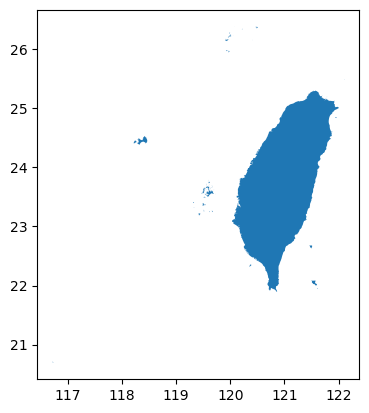

In [55]:
taiwan.plot()

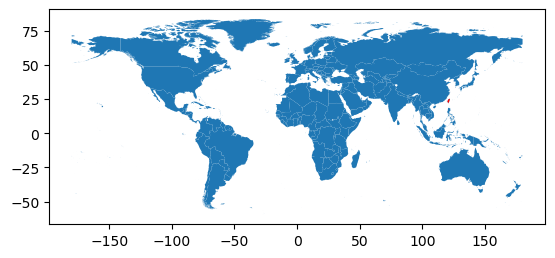

,id,id_0,iso,name_engli,name_iso,name_fao,name_local,name_obsol,name_varia,name_nonla,name_frenc,name_spani,name_russi,name_arabi,name_chine,waspartof,contains,sovereign,iso2,www,fips,ison,validfr,validto,pop2000,sqkm,popsqkm,unregion1,unregion2,developing,cis,transition,oecd,wbregion,wbincome,wbdebt,wbother,ceeac,cemac,ceplg,comesa,eac,ecowas,igad,ioc,mru,sacu,uemoa,uma,palop,parta,cacm,eurasec,agadir,saarc,asean,nafta,gcc,csn,caricom,eu,can,acp,landlocked,aosis,sids,islands,ldc,geometry
0,dz142zj5454.1,225,TWN,Taiwan,"TAIWAN, PROVINCE OF CHINA",None,T'ai-wan,None,"Taiwan, Province of China|Formosa",None,"Taïwan, Province de Chine",Taiwan,Тайвань,تايوان,台湾,None,None,Taiwan,TW,None,TW,158,Unknown,Present,22191087,36346.09,610.549498,Eastern Asia,Asia,1,0.0,0.0,0.0,None,None,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"MULTIPOLYGON (((116.71722 20.70959, 116.71778 ..."


In [56]:
f, ax = plt.subplots()
world.plot(ax=ax)
taiwan.plot(color="red", ax=ax)

# taiwan.plot()
plt.show()
taiwan

In [57]:
world.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,ID,ID,IDN,IDN,360,360,ID,IDN,Asia,Asia,South-Eastern Asia,East Asia & Pacific,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4..."
1,1,2,Admin-0 country,2,Sovereign country,Malaysia,,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,MY,MY,MYS,MYS,458,458,MY,MYS,Asia,Asia,South-Eastern Asia,East Asia & Pacific,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
2,2,3,Admin-0 country,2,Sovereign country,Republic of Chile,,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,CI,CL,CHL,CHL,152,152,CL,CHL,South America,Americas,South America,Latin America & Caribbean,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
3,3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,BL,BO,BOL,BOL,068,068,BO,BOL,South America,Americas,South America,Latin America & Caribbean,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."
4,4,5,Admin-0 country,2,Sovereign country,Republic of Peru,,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,PE,PE,PER,PER,604,604,PE,PER,South America,Americas,South America,Latin America & Caribbean,بيرو,পেরু,Peru,Peru,Perú,Pérou,Περού,पेरू,Peru,Peru,Perù,ペルー,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."


In [58]:
try_merge = world.merge(CPI, how="outer", left_on="ISO_A3", right_on="ISO3")
try_merge.head()

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
0,0.0,1.0,Admin-0 country,2.0,Sovereign country,Republic of Indonesia,,260580739.0,17.0,3028000.0,2017.0,2010.0,2016.0,4. Emerging region: MIKT,4. Lower middle income,ID,ID,IDN,IDN,360,360,ID,IDN,Asia,Asia,South-Eastern Asia,East Asia & Pacific,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.73943 4...",Indonesia,IDN,AP,38.0,96.0,37.0,102.0,40.0,85.0,38.0,89.0,37.0,96.0,37.0,90.0,88.0,36.0,107.0,34.0,114.0,32.0,118.0,32.0
1,1.0,2.0,Admin-0 country,2.0,Sovereign country,Malaysia,,31381992.0,15.0,863000.0,2017.0,2010.0,2016.0,6. Developing region,3. Upper middle income,MY,MY,MYS,MYS,458,458,MY,MYS,Asia,Asia,South-Eastern Asia,East Asia & Pacific,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Malaysia,MYS,AP,48.0,62.0,51.0,57.0,53.0,51.0,47.0,61.0,47.0,62.0,49.0,55.0,54.0,50.0,51.0,52.0,53.0,50.0,54.0,49.0
2,2.0,3.0,Admin-0 country,2.0,Sovereign country,Republic of Chile,,17789267.0,14.0,436100.0,2017.0,2002.0,2016.0,5. Emerging region: G20,3. Upper middle income,CI,CL,CHL,CHL,152,152,CL,CHL,South America,Americas,South America,Latin America & Caribbean,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Chile,CHL,AME,67.0,27.0,67.0,25.0,67.0,26.0,67.0,27.0,67.0,26.0,66.0,24.0,23.0,70.0,21.0,73.0,22.0,71.0,20.0,72.0
3,3.0,4.0,Admin-0 country,2.0,Sovereign country,Plurinational State of Bolivia,,11138234.0,14.0,78350.0,2017.0,2001.0,2016.0,5. Emerging region: G20,4. Lower middle income,BL,BO,BOL,BOL,068,068,BO,BOL,South America,Americas,South America,Latin America & Caribbean,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5...",Bolivia,BOL,AME,30.0,128.0,31.0,124.0,31.0,123.0,29.0,132.0,33.0,112.0,33.0,113.0,98.0,34.0,103.0,35.0,106.0,34.0,105.0,34.0
4,4.0,5.0,Admin-0 country,2.0,Sovereign country,Republic of Peru,,31036656.0,15.0,410400.0,2017.0,2007.0,2016.0,5. Emerging region: G20,3. Upper middle income,PE,PE,PER,PER,604,604,PE,PER,South America,Americas,South America,Latin America & Caribbean,بيرو,পেরু,Peru,Peru,Perú,Pérou,Περού,पेरू,Peru,Peru,Perù,ペルー,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009...",Peru,PER,AME,36.0,105.0,38.0,94.0,36.0,101.0,35.0,105.0,37.0,96.0,35.0,101.0,88.0,36.0,85.0,38.0,83.0,38.0,83.0,38.0


In [59]:
# try_merge[try_merge["Country"].str.match(".*Norway")]
# try_merge[try_merge["Country"].isnull()]
# test = try_merge.fillna(value="No Name")
pd.options.display.max_rows = 50

# 4 countries were not merged correctly
try_merge[try_merge["geometry"].isnull()]

# we can drop them and merge them individually
# try_merge = try_merge.iloc[[254,255,256,257]]
try_merge = try_merge.drop(index=[254,255,256,257])

try_merge[try_merge["NAME_EN"].str.match(r".*(Norway)|(Kosovo)|(France)")]

# 20 - France
# 21 - Norway
# 22 - Kosovo



,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
20,20.0,21.0,Admin-0 country,2.0,Country,French Republic,,67106161.0,16.0,2699000.0,2017.0,-99.0,2016.0,1. Developed region: G7,1. High income: OECD,FR,-99,-99,FRA,250,250,FR,FRA,Europe,Europe,Western Europe,Europe & Central Asia,فرنسا,ফ্রান্স,Frankreich,France,Francia,France,Γαλλία,फ़्रान्स,Franciaország,Perancis,Francia,フランス,프랑스,Frankrijk,Francja,França,Франция,Frankrike,Fransa,Pháp,法国,France,None,Other,102.208551,71.575818,"MULTIPOLYGON (((-54.11153 2.11427, -54.11140 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,50.0,51.0,Admin-0 country,2.0,Sovereign country,Kingdom of Norway,,5320045.0,13.0,364700.0,2017.0,2001.0,2016.0,2. Developed region: nonG7,1. High income: OECD,-99,-99,-99,-99,-99,-99,-99,NOR,Europe,Europe,Northern Europe,Europe & Central Asia,النرويج,নরওয়ে,Norwegen,Norway,Noruega,Norvège,Νορβηγία,नॉर्वे,Norvégia,Norwegia,Norvegia,ノルウェー,노르웨이,Noorwegen,Norwegia,Noruega,Норвегия,Norge,Norveç,Na Uy,挪威,Norway,None,Other,552.733226,85.597443,"MULTIPOLYGON (((20.62316 69.03636, 20.71660 69...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,62.0,63.0,Admin-0 country,2.0,Sovereign country,Republic of Kosovo,,1895250.0,12.0,18490.0,2017.0,1981.0,2016.0,6. Developing region,4. Lower middle income,KV,XK,-99,-99,-99,-099,KV,KSV,Europe,Europe,Southern Europe,Europe & Central Asia,كوسوفو,কসোভো,Kosovo,Kosovo,Kosovo,Kosovo,Κοσσυφοπέδιο,कोसोवो गणराज्य,Koszovó,Kosovo,Kosovo,コソボ共和国,코소보,Kosovo,Kosowo,Kosovo,Республика Косово,Kosovo,Kosova,Kosovo,科索沃,Kosovo,None,ECA,5.925913,1.196572,"POLYGON ((20.06496 42.54676, 20.08563 42.53001...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
try_merge[try_merge["NAME_EN"].str.match(r".*(Norway)|(Kosovo)|(France)")]


,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012
20,20.0,21.0,Admin-0 country,2.0,Country,French Republic,,67106161.0,16.0,2699000.0,2017.0,-99.0,2016.0,1. Developed region: G7,1. High income: OECD,FR,-99,-99,FRA,250,250,FR,FRA,Europe,Europe,Western Europe,Europe & Central Asia,فرنسا,ফ্রান্স,Frankreich,France,Francia,France,Γαλλία,फ़्रान्स,Franciaország,Perancis,Francia,フランス,프랑스,Frankrijk,Francja,França,Франция,Frankrike,Fransa,Pháp,法国,France,None,Other,102.208551,71.575818,"MULTIPOLYGON (((-54.11153 2.11427, -54.11140 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,50.0,51.0,Admin-0 country,2.0,Sovereign country,Kingdom of Norway,,5320045.0,13.0,364700.0,2017.0,2001.0,2016.0,2. Developed region: nonG7,1. High income: OECD,-99,-99,-99,-99,-99,-99,-99,NOR,Europe,Europe,Northern Europe,Europe & Central Asia,النرويج,নরওয়ে,Norwegen,Norway,Noruega,Norvège,Νορβηγία,नॉर्वे,Norvégia,Norwegia,Norvegia,ノルウェー,노르웨이,Noorwegen,Norwegia,Noruega,Норвегия,Norge,Norveç,Na Uy,挪威,Norway,None,Other,552.733226,85.597443,"MULTIPOLYGON (((20.62316 69.03636, 20.71660 69...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,62.0,63.0,Admin-0 country,2.0,Sovereign country,Republic of Kosovo,,1895250.0,12.0,18490.0,2017.0,1981.0,2016.0,6. Developing region,4. Lower middle income,KV,XK,-99,-99,-99,-099,KV,KSV,Europe,Europe,Southern Europe,Europe & Central Asia,كوسوفو,কসোভো,Kosovo,Kosovo,Kosovo,Kosovo,Κοσσυφοπέδιο,कोसोवो गणराज्य,Koszovó,Kosovo,Kosovo,コソボ共和国,코소보,Kosovo,Kosowo,Kosovo,Республика Косово,Kosovo,Kosova,Kosovo,科索沃,Kosovo,None,ECA,5.925913,1.196572,"POLYGON ((20.06496 42.54676, 20.08563 42.53001...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
missing_countries = ["Norway", "Kosovo", "France"]

def gen_col_names():
    col_names = []
    for num in reversed(range(12,22)):
        col_names.append("CPI score 20{}".format(num))
        col_names.append("Rank 20{}".format(num))
    return col_names

col_names = gen_col_names()
# for country in missing_countries:
#     copy = CPI[CPI["Country"] == country][col_names]
#     try_merge.loc[try_merge["NAME_EN"] == country, col_names] = CPI[CPI["Country"] == country][col_names]
#     print(try_merge.loc[try_merge["NAME_EN"] == country, col_names])
    #     print(try_merge.loc[try_merge["NAME_EN"] == country, col_names])

# CPI[CPI["Country"].str.match(r".*(Norway)|(Kosovo)|(France)")]
# CPI[CPI["Country"].str.match(r".*(Norway)|(Kosovo)|(France)")]



# try_merge[try_merge["NAME_EN"].isin(missing_countries)].loc[:,"NAME_EN":"Rank 2012"]
# CPI[CPI["Country"] == "Norway"][col_names]
# try_merge.loc[try_merge["NAME_EN"] == "Norway", col_names]

# try_merge[try_merge["NAME_EN"] == "Norway"].loc[:,"CPI score 2021":"Rank 2012"] = CPI[CPI["Country"] == "Norway"][col_names]
# # try_merge[try_merge["NAME_EN"] == "Norway", col_names]
# try_merge[try_merge["NAME_EN"] == "Norway"][col_names]

# try_merge[try_merge["NAME_EN"] == "Norway"]["CPI score 2021"] = 20
# try_merge.loc[try_merge["NAME_EN"] == "Norway", "CPI score 2021"] = CPI[CPI["Country"] == "Norway"].loc[:,"CPI score 2021"]
# try_merge[try_merge["NAME_EN"] == "Norway"]["CPI score 2021"] 
# try_merge.loc[try_merge["NAME_EN"] == "Norway", "CPI score 2021":"Rank 2012"]

try_merge.loc[try_merge["NAME_EN"] == "Norway", ["CPI score 2021", "Rank 2021"]] = CPI[CPI["Country"] == "Norway"][["CPI score 2021", "Rank 2021"]]
try_merge[try_merge["NAME_EN"] == "Norway"][col_names]

copy = CPI[CPI["Country"].isin(missing_countries)][["Country"] + col_names]
copy

try_merge.loc[try_merge["NAME_EN"] == "Norway", ["CPI score 2021", "Rank 2021"]] = CPI[CPI["Country"] == "Norway"].loc[:,["CPI score 2021","Rank 2012"]]
try_merge.loc[try_merge["NAME_EN"] == "Norway", ["CPI score 2021", "Rank 2021"]]

# try_merge.loc[try_merge["NAME_EN"] == "Norway", ["CPI score 2021"]] = CPI[CPI["Country"] == "Norway"]["CPI score 2021"].iloc[0]
for country in missing_countries:
    for col_name in col_names:
        try_merge.loc[try_merge["NAME_EN"] == country, [col_name]] = CPI[CPI["Country"] == country].loc[:, col_name].iloc[0]
try_merge[try_merge["NAME_EN"].isin(missing_countries)].loc[:,"NAME_EN":"Rank 2012"]
# try_merge.loc[try_merge["NAME_EN"] == "Norway", "CPI score 2021":"Rank 2012"] 
# CPI[CPI["Country"] == "Norway"]["CPI score 2021"]
# CPI[CPI["Country"] == "Norway"][["CPI score 2021"]]
# try_merge.merge(copy, how="left", left_on="NAME_EN", right_on="")

# try_merge.merge(copy, how="left", left_on="NAME_EN", right_on="")
# try_merge.info()

,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012
20,France,Francia,France,Γαλλία,फ़्रान्स,Franciaország,Perancis,Francia,フランス,프랑스,Frankrijk,Francja,França,Франция,Frankrike,Fransa,Pháp,法国,France,None,Other,102.208551,71.575818,"MULTIPOLYGON (((-54.11153 2.11427, -54.11140 2...",NaN,NaN,NaN,71.0,22.0,69.0,23.0,69.0,23.0,72.0,21.0,70.0,23.0,69.0,23.0,23.0,70.0,27.0,69.0,22.0,71.0,22.0
21,Norway,Noruega,Norvège,Νορβηγία,नॉर्वे,Norvégia,Norwegia,Norvegia,ノルウェー,노르웨이,Noorwegen,Norwegia,Noruega,Норвегия,Norge,Norveç,Na Uy,挪威,Norway,None,Other,552.733226,85.597443,"MULTIPOLYGON (((20.62316 69.03636, 20.71660 69...",NaN,NaN,NaN,85.0,4.0,84.0,7.0,84.0,7.0,84.0,7.0,85.0,3.0,85.0,6.0,5.0,88.0,5.0,86.0,5.0,86.0,7.0
22,Kosovo,Kosovo,Kosovo,Κοσσυφοπέδιο,कोसोवो गणराज्य,Koszovó,Kosovo,Kosovo,コソボ共和国,코소보,Kosovo,Kosowo,Kosovo,Республика Косово,Kosovo,Kosova,Kosovo,科索沃,Kosovo,None,ECA,5.925913,1.196572,"POLYGON ((20.06496 42.54676, 20.08563 42.53001...",NaN,NaN,NaN,39.0,87.0,36.0,104.0,36.0,101.0,37.0,93.0,39.0,85.0,36.0,95.0,102.0,33.0,110.0,33.0,111.0,33.0,105.0


TypeError: __init__() got an unexpected keyword argument 'vmin'

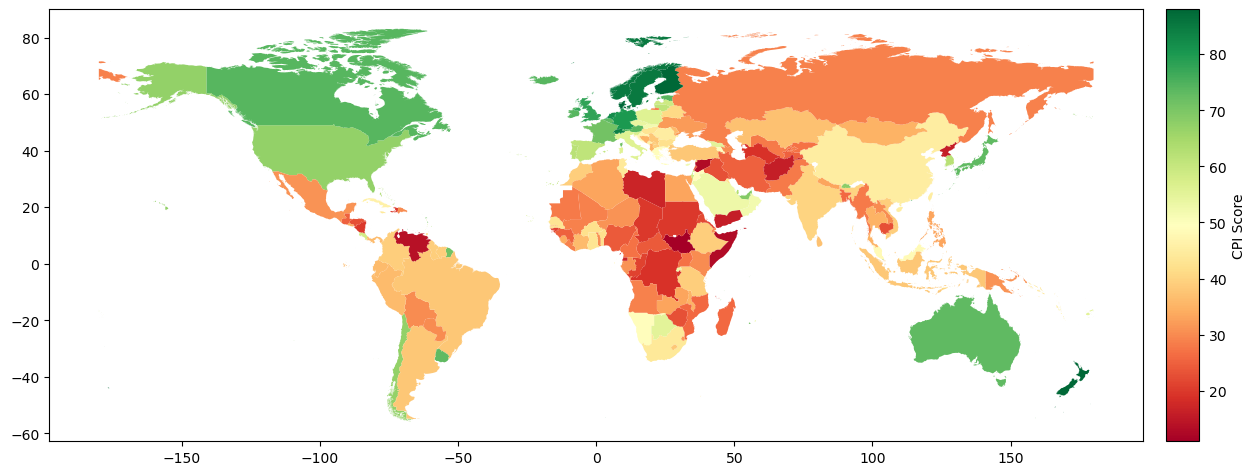

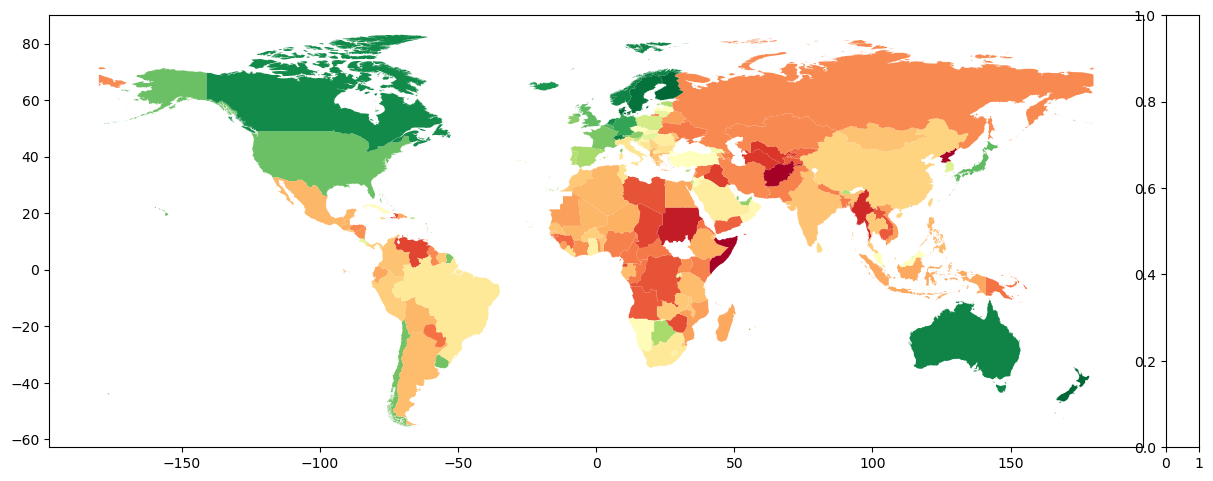

In [124]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1, figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
try_merge.plot(column='CPI score 2021', ax=ax,  legend=True, legend_kwds={'label': "CPI Score"}, 
               cax=cax,
               cmap='RdYlGn');
fig, ax = plt.subplots(1, 1, figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
cax.vmax=100
try_merge.plot(column='CPI score 2012', ax=ax,  legend=True, legend_kwds={'label': "CPI Score", 'vmin':0}, 
               cax=cax,
               cmap='RdYlGn')

In [96]:
CPI[CPI["Country"] == "Norway"].loc[:,"CPI score 2021":"Rank 2012"].iloc[0]

CPI score 2021    85.0
Rank 2021          4.0
CPI score 2020    84.0
Rank 2020          7.0
CPI score 2019    84.0
Rank 2019          7.0
CPI score 2018    84.0
Rank 2018          7.0
CPI score 2017    85.0
Rank 2017          3.0
CPI score 2016    85.0
Rank 2016          6.0
Rank 2015          5.0
CPI score 2015    88.0
Rank 2014          5.0
CPI score 2014    86.0
Rank 2013          5.0
CPI score 2013    86.0
Rank 2012          7.0
Name: 3, dtype: float64

In [80]:
try_merge.loc[try_merge["NAME_EN"] == "Norway", "CPI score 2021"] 

21   NaN
Name: CPI score 2021, dtype: float64

In [72]:
try_merge.loc[try_merge["NAME_EN"] == "Norway", ["CPI score 2021", "Rank 2021"]]

,CPI score 2021,Rank 2021
21,20.0,NaN


In [63]:
CPI[CPI["Country"] == "Norway"].loc[:,["CPI score 2021","Rank 2012"]]

,CPI score 2021,Rank 2012
3,85.0,7.0


In [64]:
# world["iso_a3"]

# world[world["name"].str.match("S.*")]
world[world["NAME_EN"] == "Romania"]


,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
71,71,72,Admin-0 country,2,Sovereign country,Romania,,21529967,15,441000.0,2017,2011,2016,2. Developed region: nonG7,3. Upper middle income,RO,RO,ROU,ROU,642,642,RO,ROM,Europe,Europe,Eastern Europe,Europe & Central Asia,رومانيا,রোমানিয়া,Rumänien,Romania,Rumania,Roumanie,Ρουμανία,रोमानिया,Románia,Rumania,Romania,ルーマニア,루마니아,Roemenië,Rumunia,Roménia,Румыния,Rumänien,Romanya,Romania,羅馬尼亞,Romania,None,ECA,31.534915,27.387182,"POLYGON ((22.87760 47.94674, 22.86117 47.93382..."


In [65]:
try_merge[try_merge["geometry"].isnull()]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry,Country,ISO3,Region,CPI score 2021,Rank 2021,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2018,Rank 2018,CPI score 2017,Rank 2017,CPI score 2016,Rank 2016,Rank 2015,CPI score 2015,Rank 2014,CPI score 2014,Rank 2013,CPI score 2013,Rank 2012,CPI score 2012


In [66]:
world[world["NAME_EN"].str.match(".*Norway|France|Taiwan|Kosovo.*")]

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
20,20,21,Admin-0 country,2,Country,French Republic,,67106161,16,2699000.0,2017,-99,2016,1. Developed region: G7,1. High income: OECD,FR,-99,-99,FRA,250,250,FR,FRA,Europe,Europe,Western Europe,Europe & Central Asia,فرنسا,ফ্রান্স,Frankreich,France,Francia,France,Γαλλία,फ़्रान्स,Franciaország,Perancis,Francia,フランス,프랑스,Frankrijk,Francja,França,Франция,Frankrike,Fransa,Pháp,法国,France,None,Other,102.208551,71.575818,"MULTIPOLYGON (((-54.11153 2.11427, -54.11140 2..."
50,50,51,Admin-0 country,2,Sovereign country,Kingdom of Norway,,5320045,13,364700.0,2017,2001,2016,2. Developed region: nonG7,1. High income: OECD,-99,-99,-99,-99,-99,-99,-99,NOR,Europe,Europe,Northern Europe,Europe & Central Asia,النرويج,নরওয়ে,Norwegen,Norway,Noruega,Norvège,Νορβηγία,नॉर्वे,Norvégia,Norwegia,Norvegia,ノルウェー,노르웨이,Noorwegen,Norwegia,Noruega,Норвегия,Norge,Norveç,Na Uy,挪威,Norway,None,Other,552.733226,85.597443,"MULTIPOLYGON (((20.62316 69.03636, 20.71660 69..."
62,62,63,Admin-0 country,2,Sovereign country,Republic of Kosovo,,1895250,12,18490.0,2017,1981,2016,6. Developing region,4. Lower middle income,KV,XK,-99,-99,-99,-099,KV,KSV,Europe,Europe,Southern Europe,Europe & Central Asia,كوسوفو,কসোভো,Kosovo,Kosovo,Kosovo,Kosovo,Κοσσυφοπέδιο,कोसोवो गणराज्य,Koszovó,Kosovo,Kosovo,コソボ共和国,코소보,Kosovo,Kosowo,Kosovo,Республика Косово,Kosovo,Kosova,Kosovo,科索沃,Kosovo,None,ECA,5.925913,1.196572,"POLYGON ((20.06496 42.54676, 20.08563 42.53001..."


In [67]:
# Taiwan is a special case because it is included under China as far as geometry is concerned

world[world["NAME_EN"].str.match(".*T.*")]
# for name in world["NAME_EN"]:
#     print(name)

,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
18,18,19,Admin-0 country,2,Sovereign country,United Republic of Tanzania,,53950935,16,150600.00,2017,2002,2016,7. Least developed region,5. Low income,TZ,TZ,TZA,TZA,834,834,TZ,TZA,Africa,Africa,Eastern Africa,Sub-Saharan Africa,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,Tanzanie,Τανζανία,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,Tanzania,Don't use United Republic of Tanzania,AFR,51.175098,77.018650,"MULTIPOLYGON (((32.92086 -9.40790, 32.93626 -9..."
40,40,41,Admin-0 country,2,Sovereign country,Republic of Tajikistan,,8468555,13,25810.00,2017,2010,2016,6. Developing region,5. Low income,TI,TJ,TJK,TJK,762,762,TJ,TJK,Asia,Asia,Central Asia,Europe & Central Asia,طاجيكستان,তাজিকিস্তান,Tadschikistan,Tajikistan,Tayikistán,Tadjikistan,Τατζικιστάν,ताजिकिस्तान,Tádzsikisztán,Tajikistan,Tagikistan,タジキスタン,타지키스탄,Tadzjikistan,Tadżykistan,Tajiquistão,Таджикистан,Tadzjikistan,Tacikistan,Tajikistan,塔吉克斯坦,Tajikistan,None,ECA,36.692706,14.696673,"MULTIPOLYGON (((70.56590 41.01838, 70.54978 41..."
63,63,64,Admin-0 country,2,Sovereign country,Republic of Turkey,,80845215,16,1670000.00,2017,2000,2016,4. Emerging region: MIKT,3. Upper middle income,TU,TR,TUR,TUR,792,792,TR,TUR,Asia,Asia,Western Asia,Europe & Central Asia,تركيا,তুরস্ক,Türkei,Turkey,Turquía,Turquie,Τουρκία,तुर्की,Törökország,Turki,Turchia,トルコ,터키,Turkije,Turcja,Turquia,Турция,Turkiet,Türkiye,Thổ Nhĩ Kỳ,土耳其,Turkey,None,ECA,87.588305,81.209448,"MULTIPOLYGON (((43.44043 41.10659, 43.45180 41..."
70,70,71,Admin-0 country,2,Sovereign country,Republic of Tunisia,,11403800,14,130800.00,2017,2004,2016,6. Developing region,3. Upper middle income,TS,TN,TUN,TUN,788,788,TN,TUN,Africa,Africa,Northern Africa,Middle East & North Africa,تونس,তিউনিসিয়া,Tunesien,Tunisia,Túnez,Tunisie,Τυνησία,ट्यूनिशिया,Tunézia,Tunisia,Tunisia,チュニジア,튀니지,Tunesië,Tunezja,Tunísia,Тунис,Tunisien,Tunus,Tunisia,突尼西亞,Tunisia,None,MENA,27.098651,15.310749,"MULTIPOLYGON (((11.50511 33.18123, 11.50457 33..."
106,106,107,Admin-0 country,2,Sovereign country,Kingdom of Thailand,,68414135,16,1161000.00,2017,2010,2016,5. Emerging region: G20,3. Upper middle income,TH,TH,THA,THA,764,764,TH,THA,Asia,Asia,South-Eastern Asia,East Asia & Pacific,تايلاند,থাইল্যান্ড,Thailand,Thailand,Tailandia,Thaïlande,Ταϊλάνδη,थाईलैण्ड,Thaiföld,Thailand,Thailandia,タイ王国,태국,Thailand,Tajlandia,Tailândia,Таиланд,Thailand,Tayland,Thái Lan,泰国,Thailand,None,EAP,76.749023,43.323902,"MULTIPOLYGON (((102.91358 11.64590, 102.92879 ..."
114,114,115,Admin-0 country,2,Sovereign country,Democratic Republic of Timor-Leste,,1291358,12,4975.00,2017,2010,2016,7. Least developed region,4. Lower middle income,TT,TL,TLS,TLS,626,626,TP,TMP,Asia,Asia,South-Eastern Asia,East Asia & Pacific,تيمور الشرقية,পূর্ব তিমুর,Osttimor,East Timor,Timor Oriental,Timor oriental,Ανατολικό Τιμόρ,पूर्वी तिमोर,Kelet-Timor,Timor Leste,Timor Est,東ティモール,동티모르,Oost-Timor,Timor Wschodni,Timor-Leste,Восточный Тимор,Östtimor,Doğu Timor,Đông Timor,东帝汶,Timor-Leste,Don't use East Timor,EAP,8.253505,1.239587,"MULTIPOLYGON (((124.45053 -9.18019, 124.45021 ..."
137,137,138,Admin-0 country,2,Sovereign country,Turkmenistan,,5351277,13,94720.00,2017,1995,2016,6. Developing region,3. Upper middle income,TX,TM,TKM,TKM,795,795,TM,TKM,Asia,Asia,Central Asia,Europe & Central Asia,تركمانستان,তুর্কমেনিস্তান,Turkmenistan,Turkmenistan,Turkmenistán,Turkménistan,Τουρκμενιστάν,तुर्कमेनिस्तान,Türkmenisztán,Turkmenistan,Turkmenistan,トルクメニスタン,투르크메니스탄,Turkmenistan,Turkmenistan,Turquemenistão,Туркмения,Turkmen

## Archive

In [68]:
# ignore this

# we decide to progressively lower the range until we can identify the problematic row's index
# we're doing it manually, but a function is more appropriate here

# this shows no nulls
# CPI[:100].info()

# this shows a null
# CPI[100:].info()

# this shows no nulls
# CPI[100:150].info()

# this shows a null
# CPI[150:].info()

# this shows no nulls
# CPI[150:175].info()

# this shows a null
# CPI[175:].info()

# explore the rows in the identified range
# CPI[175:]

# # index 186 is the problem. Why weren't we able to filter its Country?
# elusive_country = CPI.iloc[186]["Country"] 

# the value is "nan" but it's not a string

# type(elusive_country)



# and checking with math.isnan()
# type(CPI.iloc[186]["Country"])

In [69]:
# def clean_inconsistent_names(df, keep_indexes, copy_dicts):
#     for keep_index, copy_dict in zip(keep_indexes, copy_dicts):
#         for copy_index, cols in copy_dict.items():
#             CPI.loc[keep_index, cols] = CPI.loc[copy_index, cols]
    
#     drop_rows = []
#     for dict in copy_dicts:
#             drop_rows += dict.keys()
#     drop_rows = list(drop_rows)
#     # DEBUG
#     print(drop_rows)
#     CPI.drop(drop_rows, axis=0, inplace=True)
#     try:
#         CPI.reset_index(drop=True, inplace=True)
#     except e:
#         print("Failed to reset index{}".format(e))
    

# ivorycoast_clean_dicts = {
#                             185: ["CPI score 2017", "Rank 2017"],
#                             190: ["CPI score 2016", "Rank 2016"],
#                             194: ["CPI score 2015", "Rank 2015", "CPI score 2014", "CPI score 2014", 
#                                   "CPI score 2013", "CPI score 2013", "CPI score 2012", "CPI score 2012"]
# }

# clean_inconsistent_names(CPI, [181], [ivorycoast_clean_dicts])
# # CPI.reset_index(drop=True, inplace=True)
# CPI[CPI["Country"].str.contains("Côte")]